In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url1 = 'https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities-time.csv'
url2 = 'https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv'
municipiosTodos = pd.read_csv(url1)
estados = pd.read_csv(url2)

In [3]:
display(municipiosTodos)
display(estados)

,date,country,state,city,ibgeID,newDeaths,deaths,newCases,totalCases
0,2020-02-25,Brazil,SP,São Paulo/SP,3550308,0,0,1,1
1,2020-02-25,Brazil,TOTAL,TOTAL,0,0,0,1,1
2,2020-02-26,Brazil,SP,São Paulo/SP,3550308,0,0,0,1
3,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,0,1
4,2020-02-27,Brazil,SP,São Paulo/SP,3550308,0,0,0,1
...,...,...,...,...,...,...,...,...,...
14435,2020-04-14,Brazil,GO,Águas Lindas de Goiás/GO,5200258,0,0,0,2
14436,2020-04-14,Brazil,SC,Águas Mornas/SC,4200606,0,0,0,1
14437,2020-04-14,Brazil,SP,Águas de Lindóia/SP,3500501,0,1,0,1
14438,2020-04-14,Brazil,SP,Águas de São Pedro/SP,3500600,0,0,0,1


,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS
0,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0
1,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0
2,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1
3,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1
4,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
933,2020-04-14,Brazil,SC,TOTAL,0,26,27,853,26,826
934,2020-04-14,Brazil,SE,TOTAL,0,4,0,45,4,45
935,2020-04-14,Brazil,SP,TOTAL,87,695,476,9371,695,9371
936,2020-04-14,Brazil,TO,TOTAL,0,0,0,26,0,26


### Após carregar os 2 datasets, um contém apenas a estatística por Estados Brasileiros e o outro possui as estatísticas mais detalhadas sobre os muncípios, então, resolvo cruzar as informações com a finalidade de comparar o caso total de COVID19 por um Estado, sua capital e alguma outra cidade referente a este Estado.

Crio um dataframe com todos os muncípios com casos de Minas Gerais que foram cadastrados

In [4]:
estado_mg = estados[estados.state.str.contains('MG')]
datamg = municipiosTodos[municipiosTodos.city.str.contains('/MG')]
datamg.city = [x.rstrip('/MG') for x in datamg.city]
datamg.city = [x.replace('TOTAL','MG') for x in datamg.city]
display(datamg)

b:\python\3.7\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,date,country,state,city,ibgeID,newDeaths,deaths,newCases,totalCases
38,2020-03-08,Brazil,MG,Divinópolis,3122306,0,0,1,1
48,2020-03-09,Brazil,MG,Divinópolis,3122306,0,0,0,1
59,2020-03-10,Brazil,MG,Divinópolis,3122306,0,0,0,1
71,2020-03-11,Brazil,MG,Divinópolis,3122306,0,0,0,1
87,2020-03-12,Brazil,MG,Divinópolis,3122306,0,0,0,1
...,...,...,...,...,...,...,...,...,...
14389,2020-04-14,Brazil,MG,Uberlândia,3170206,2,4,6,61
14390,2020-04-14,Brazil,MG,Ubá,3169901,0,0,-1,3
14392,2020-04-14,Brazil,MG,Unaí,3170404,0,0,0,1
14406,2020-04-14,Brazil,MG,Varginha,3170701,0,1,0,7


In [ ]:
#salvo em csv e json para outras análises
datamg.to_csv('mg.csv', index='index')
datamg.to_json('mg.json',orient='index')

## Resolvo comparar uma cidade de Minas com sua sua capital e todos os casos do Estado

In [5]:
comparar = datamg[datamg.city.str.contains('Juiz de Fora|Belo Horizonte')]
estado_mg.set_index('date',inplace=True)
comparar.set_index('date',inplace=True)
comparar = pd.concat([estado_mg, comparar], join="inner")
comparar.drop(['country', 'state','newDeaths', 'deaths', 'newCases'],axis=1,inplace=True)
comparar.reset_index(inplace=True)
comparar

,date,city,totalCases
0,2020-03-08,TOTAL,1
1,2020-03-09,TOTAL,1
2,2020-03-10,TOTAL,1
3,2020-03-11,TOTAL,1
4,2020-03-12,TOTAL,2
...,...,...,...
95,2020-04-12,Juiz de Fora,60
96,2020-04-13,Belo Horizonte,357
97,2020-04-13,Juiz de Fora,61
98,2020-04-14,Belo Horizonte,373


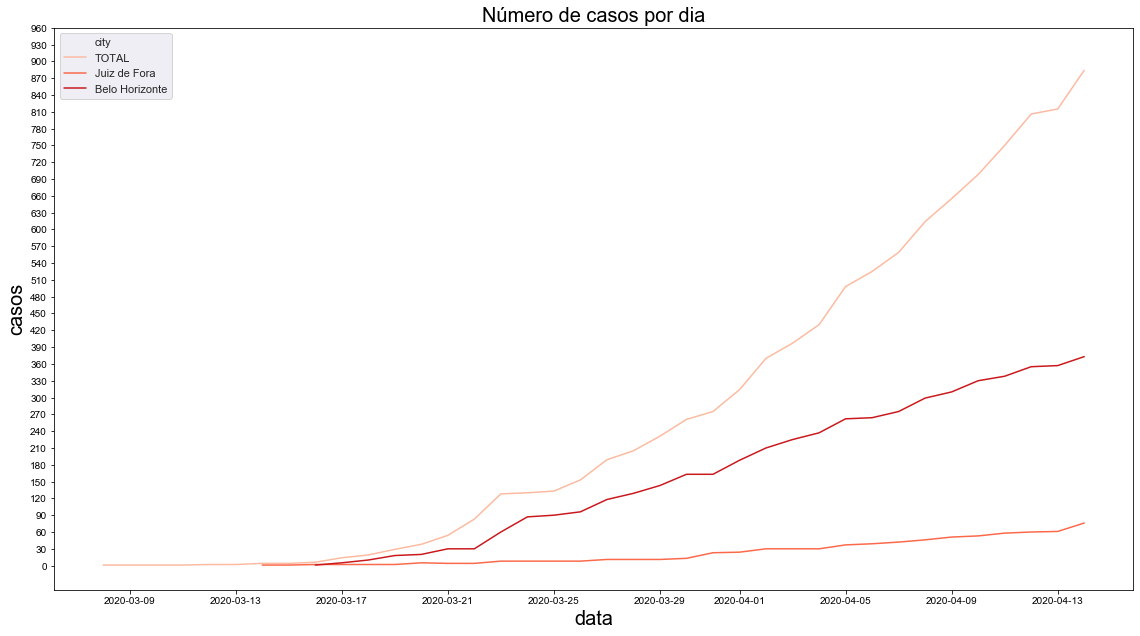

In [6]:
comparar.date = pd.to_datetime(comparar.date)
fig, ax = plt.subplots(figsize=(16,9))
sns.set()
ax = sns.lineplot(x='date', y='totalCases', hue='city',data=comparar, markers=True, dashes=False, palette="Reds", legend="full")
plt.xlabel('data', size=20)
plt.ylabel('casos', size=20)
plt.title('Número de casos por dia', size=20)
plt.yticks(np.arange(0, max(comparar.totalCases)+100, 30))
plt.tight_layout()

## Outra forma de ver a progressão é olhar para um mapa de calor separado em período de 3 dias e assim, temos uma outra forma de ver a intensidade da progressão dos casos

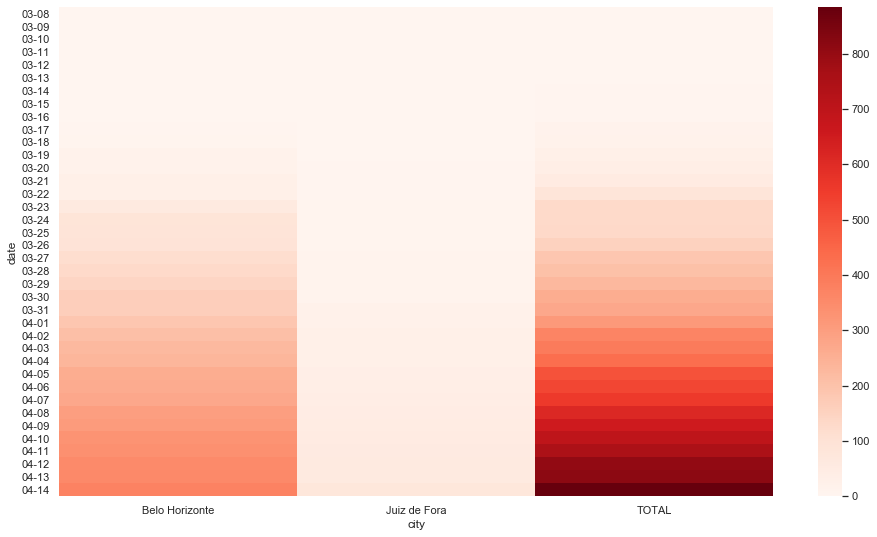

In [7]:
# crio um dataframe com as datas de 3 em 3 dias
date = pd.date_range(comparar.date[0], periods=3)

# cio uma tabela pivot para comparar o heatmap e ver a relação do COVID-19 com as datas
piv = pd.pivot_table(comparar, values='totalCases',index=comparar.date.dt.strftime('%m-%d'), columns=comparar.city, fill_value=0)
fig, ax = plt.subplots(figsize=(16,9))
sns.heatmap(piv, cmap='Reds')